Projeto das 8 Rainhas

Grupo: Anderson Carneiro da Silva (acs6@cin.ufpe.br) e Lucas Thierry Chaves Muniz (ltcm@cin.ufpe.br)

Através do uso da biblioteca geneticalgorithm (https://pypi.org/project/geneticalgorithm/) e uma função fitness criada por nós mesmos, iremos iniciar os experimentos.

In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

Definição da função fitness (f)

In [2]:
def diag_hit(myX,myY,otherX,otherY):
    supX=otherX
    supY=otherY
    while supX>=0 and supY>=0:
        if supX==myX and supY==myY:
            return 1
        supX-=1
        supY-=1
    supX=otherX
    supY=otherY
    while supX<=8 and supY<=8:
        if supX==myX and supY==myY:
            return 1
        supX+=1
        supY+=1
    supX=otherX
    supY=otherY
    while supX<=0 and supY<=8:
        if supX==myX and supY==myY:
            return 1
        supX-=1
        supY+=1
    supX=otherX
    supY=otherY
    while supX<=8 and supY<=0:
        if supX==myX and supY==myY:
            return 1
        supX+=1
        supY-=1
    return 0

def check_hit(myX,myY,otherX,otherY):
    hits = 0
    if myY==otherY:
        hits+=1
    elif diag_hit(myX,myY,otherX,otherY):
        hits+=1
    return hits
    

def f(X):
    index = 0
    failures = 0
    for row in X:
        index_aux = 0
        for row_aux in X:
            #print(row_aux)
            if index!=index_aux:
                failures += check_hit(index,row,index_aux,row_aux)
            index_aux +=1
        index+=1
    return failures

Criamos os limites do genoma com 8 posições e 8 valores possíveis para cada célula

 The best solution found:
 [7. 5. 4. 6. 1. 3. 2. 8.]

 Objective function:
 0.0


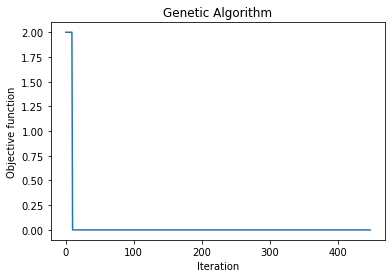

In [3]:
varbound=np.array([[1,8]]*8)

model=ga(function=f,dimension=8,variable_type='int',variable_boundaries=varbound)

model.run()